In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.datasets import make_blobs

In [52]:
import numpy as np

In [53]:
def make_forge():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

In [54]:
X, y = make_forge()

In [55]:
X.shape, y.shape

((26, 2), (26,))

In [56]:
type(X)

numpy.ndarray

In [57]:
import matplotlib.pyplot as plt

In [58]:
X[y==0]

array([[11.0329545 , -0.16816717],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 9.67284681, -0.20283165],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ]])

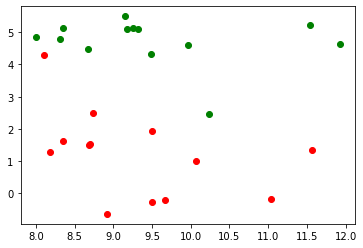

In [59]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green')

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X, y)

LogisticRegression()

In [62]:
lr.coef_, lr.intercept_

(array([[0.67289534, 1.53136443]]), array([-11.0975882]))

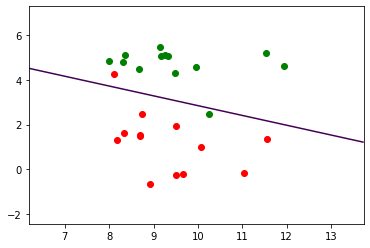

In [63]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green')

eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = lr.predict_proba(X_grid)[:, 1]
plt.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])

In [64]:
decision_values = lr.predict_proba(X_grid)[:, 1]
decision_values

array([2.31274913e-05, 2.32452802e-05, 2.33636691e-05, ...,
       9.99910290e-01, 9.99910745e-01, 9.99911197e-01])

In [65]:
X_grid

array([[ 6.19308997, -2.44499515],
       [ 6.20063976, -2.44499515],
       [ 6.20818956, -2.44499515],
       ...,
       [13.72023467,  7.30338536],
       [13.72778447,  7.30338536],
       [13.73533426,  7.30338536]])

In [66]:
t = np.dot(X_grid, lr.coef_[0]) + lr.intercept_
t

array([-10.67446542, -10.6693852 , -10.66430498, ...,   9.31883835,
         9.32391857,   9.32899879])

In [67]:
1/(1+np.exp(-t))

array([2.31274913e-05, 2.32452802e-05, 2.33636691e-05, ...,
       9.99910290e-01, 9.99910745e-01, 9.99911197e-01])

## learning

In [68]:
def step(b1, b2, b0, alpha):
    b1 += alpha * np.dot((y - np.dot(X, [b1, b2]) - b0),X[:,0])/len(X[:,0])
    b2 += alpha * np.dot((y - np.dot(X, [b1, b2]) - b0),X[:,1])/len(X[:,0])
    b0 += alpha * np.sum((y - np.dot(X, [b1, b2]) - b0))/len(X[:,0])

    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green')

    eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    t = np.dot(X_grid, [b1, b2]) + b0

    decision_values = 1/(1+np.exp(-t))
    plt.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])

    t1 = np.dot(X, [b1, b2]) + b0
    t2 = 1/(1+np.exp(-t1))
    return b1, b2, b0, lr.coef_, lr.intercept_, np.sum(y*np.log(t2) + (1-y)*np.log(1-t2))

In [69]:
# alpha = 1.0e-3
alpha = 1.0e-5

In [70]:
b1, b2, b0 = np.random.randn(3)
b1, b2, b0

(-1.0325889860496102, 0.7998671330442624, -0.4748106210575244)

-0.24104269865956726 0.9290513555261812 -0.40096376359928354 [[0.67289534 1.53136443]] [-11.0975882] -7.264163031896599


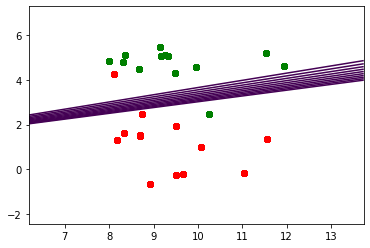

In [74]:
for i in range(10):
    b1, b2, b0, *tmp = step(b1, b2, b0, 1.0e-3)
print(b1, b2, b0, *tmp)

-0.24060381006921697 0.9288685715885562 -0.4009226678191319 [[0.67289534 1.53136443]] [-11.0975882] -7.266371822517053


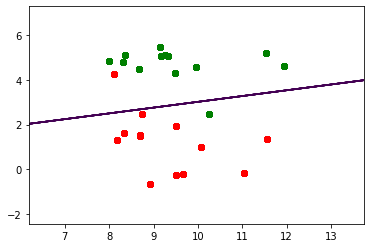

In [75]:
for i in range(10):
    b1, b2, b0, *tmp = step(b1, b2, b0, 1.0e-5)
print(b1, b2, b0, *tmp)